In [3]:
library(SIMLR)
library(igraph)
library(rhdf5)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
data(BuettnerFlorian)
data(ZeiselAmit)

In [39]:
dim(BuettnerFlorian$in_X)

[1] 8989  182

In [4]:
set.seed(11111)
example = SIMLR(X = BuettnerFlorian$in_X, c = BuettnerFlorian$n_clust, cores.ratio = 0)

Computing the multiple Kernels.
Performing network diffiusion.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Iteration:  6 
Iteration:  7 
Iteration:  8 
Iteration:  9 
Iteration:  10 
Iteration:  11 


Warning message in SIMLR(X = BuettnerFlorian$in_X, c = BuettnerFlorian$n_clust, :
“Maybe you should set a larger value of c.”

Performing t-SNE.
Epoch: Iteration # 100  error is:  0.1326426 
Epoch: Iteration # 200  error is:  0.08721104 
Epoch: Iteration # 300  error is:  0.05808032 
Epoch: Iteration # 400  error is:  0.05713627 
Epoch: Iteration # 500  error is:  0.0570977 
Epoch: Iteration # 600  error is:  0.0570602 
Epoch: Iteration # 700  error is:  0.05702496 
Epoch: Iteration # 800  error is:  0.05699161 
Epoch: Iteration # 900  error is:  0.05696026 
Epoch: Iteration # 1000  error is:  0.05693017 
Performing Kmeans.
Performing t-SNE.
Epoch: Iteration # 100  error is:  11.21592 
Epoch: Iteration # 200  error is:  0.6659411 
Epoch: Iteration # 300  error is:  0.5755609 
Epoch: Iteration # 400  error is:  0.3986313 
Epoch: Iteration # 500  error is:  0.4913843 
Epoch: Iteration # 600  error is:  0.3970208 
Epoch: Iteration # 700  error is:  0.3979712 
Epoch: Iteration # 800  error is:  0.3530334 
Epoch: Iteration # 900  error is:  0.3026329 
Epoch: Iteration # 1000  error is:  0.2887195 


In [5]:
BuettnerFlorian$true_labs[,1]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [6]:
example$y$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 2 3 3 3 2 3 3 2 3 3 2 3 3 2 3 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [7]:
nmi_1 = compare(BuettnerFlorian$true_labs[,1], example$y$cluster, method="nmi")
nmi_1

[1] 0.888298

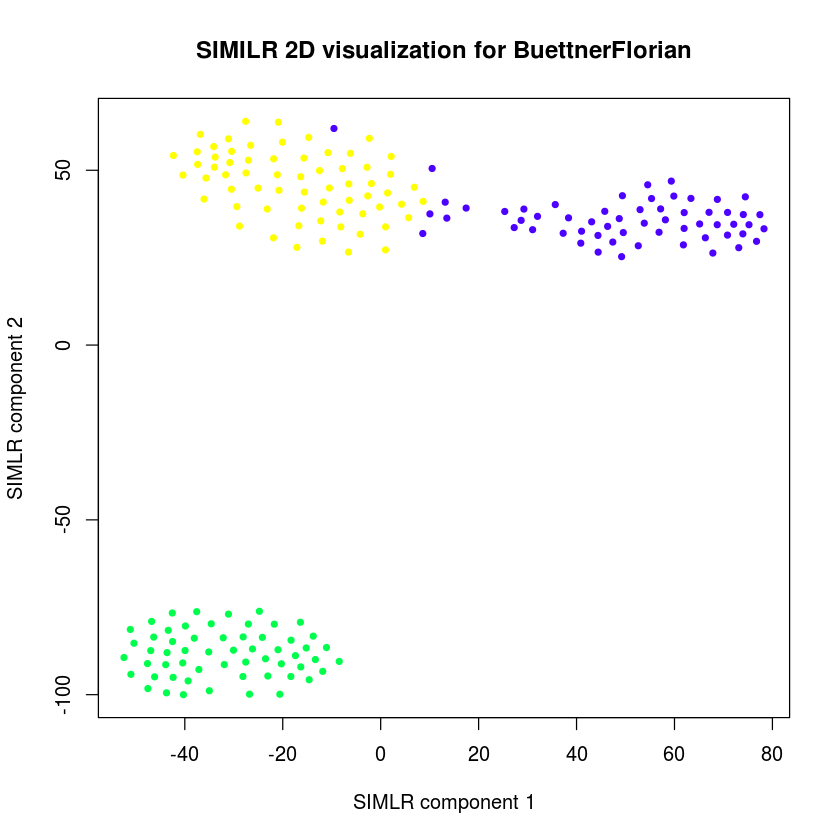

In [8]:
plot(example$ydata,
    col = c(topo.colors(BuettnerFlorian$n_clust))[BuettnerFlorian$true_labs[,1]],
    xlab = "SIMLR component 1",
    ylab = "SIMLR component 2",
    pch = 20,
    main="SIMILR 2D visualization for BuettnerFlorian")

In [12]:
?SIMLR

In [13]:
dim(BuettnerFlorian$in_X)

[1] 8989  182

In [ ]:
#Kernel dies
set.seed(11111)
example_large_scale = SIMLR_Large_Scale(X = BuettnerFlorian$in_X, c = BuettnerFlorian$n_clust, kk = 10)

In [4]:
nmi_2 = compare(BuettnerFlorian$true_labs[,1], example_large_scale$y$cluster, method= "nmi")
nmi_2

[1] 0.04158302

In [4]:
h5f = H5Fopen('../simulated/dropout_present/melanomaS2_sim_loc3.loom')

In [5]:
h5f

HDF5 FILE
        name /
    filename 

       name       otype  dclass         dim
0 col_attrs H5I_GROUP                      
1 layers    H5I_GROUP                      
2 matrix    H5I_DATASET INTEGER 1000 x 2495
3 row_attrs H5I_GROUP                      

In [6]:
splat_data = h5f$matrix

In [7]:
dim(splat_data)

[1] 1000 2495

In [13]:
true_labels = h5f$col_attrs$cell_groups
true_labels = as.numeric(lapply(true_labels, function(x) substr(x, start = 6, stop = 7)))

In [ ]:
splat_simlr = SIMLR(X = splat_data, c = 3, cores.ratio = 0)
nmi_2 = compare(true_labels, splat_simlr$y$cluster, method= "nmi")
nmi_2

In [15]:
nmi_2 = compare(true_labels, splat_simlr$y$cluster, method= "nmi")
nmi_2

[1] 0.114963

In [16]:
splat_simlr$execution.time

    user   system  elapsed 
6702.923  288.252 7079.390 

In [9]:
?SIMLR_Large_Scale

In [28]:
length(true_labels)

[1] 2495

In [ ]:
splat_simlr = SIMLR_Large_Scale(X = BuettnerFlorian$in_X, c = BuettnerFlorian$n_clust, kk = 100, normalize=FALSE)

In [35]:
dim(splat_simlr$ydata)

[1] 2495    2

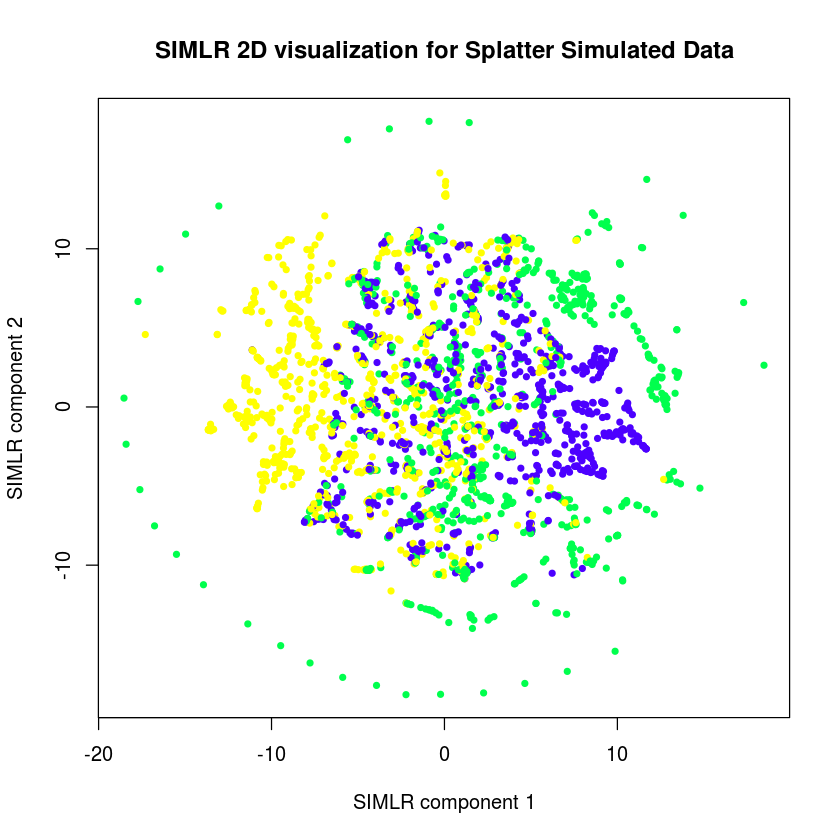

In [37]:
plot(splat_simlr$ydata,
    col = c(topo.colors(3)) [true_labels],
    xlab = "SIMLR component 1",
    ylab = "SIMLR component 2",
    pch = 20,
    main="SIMLR 2D visualization for Splatter Simulated Data")

In [21]:
nmi_2 = compare(true_labels, splat_simlr$y$cluster, method= "nmi")
nmi_2

[1] 0.06076652

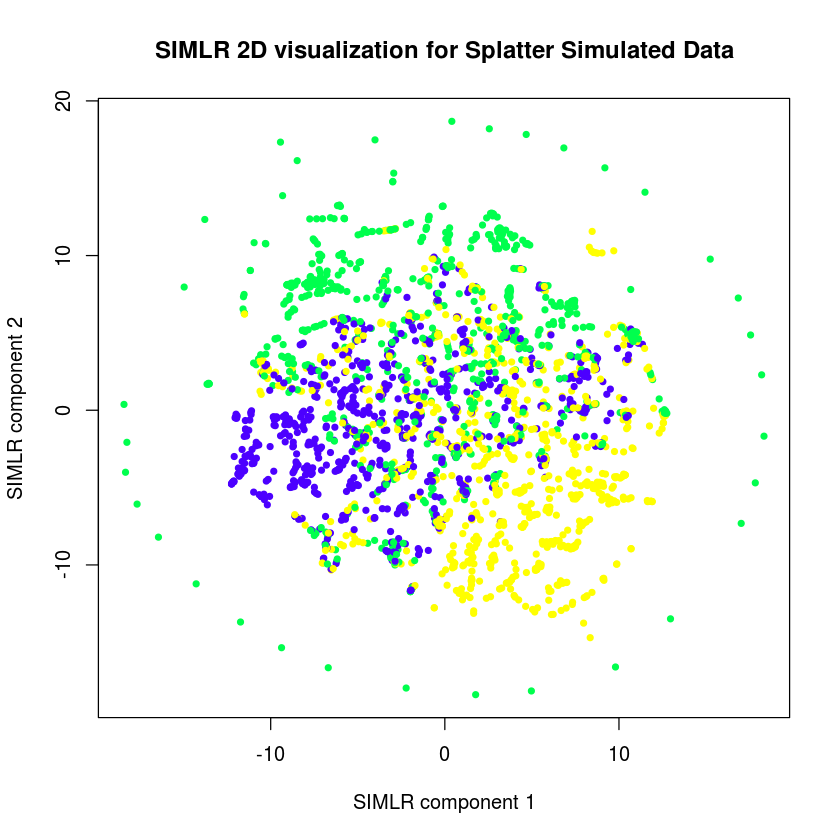

In [19]:
plot(splat_simlr$ydata,
    col = c(topo.colors(3)) [true_labels],
    xlab = "SIMLR component 1",
    ylab = "SIMLR component 2",
    pch = 20,
    main="SIMLR 2D visualization for Splatter Simulated Data")

In [20]:
nmi_2 = compare(true_labels, splat_simlr$y$cluster, method= "nmi")
nmi_2

[1] 0.06076652

In [8]:
data(ZeiselAmit)

In [64]:
H5Fclose(h5f)